<a href="https://colab.research.google.com/github/Kiem-cmd/Statistic_Learn/blob/main/Estimates_of_Location.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.DataFrame({'State':['Alabana','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','England','VietNam'],
                     'Population':[1,2,3,4,5,6,7,8,9,10],
                     'Murder rate':[5.7,5.6,4.7,5.6,4.4,2.8,2.4,5.8,5.9,6]})

In [ ]:
data

,State,Population,Murder rate
0,Alabana,1,5.7
1,Alaska,2,5.6
2,Arizona,3,4.7
3,Arkansas,4,5.6
4,California,5,4.4
5,Colorado,6,2.8
6,Connecticut,7,2.4
7,Delaware,8,5.8
8,England,9,5.9
9,VietNam,10,6.0


Mean : The sum of all values divided bu the number of values 

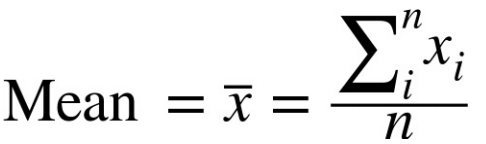

In [ ]:
np.mean(data['Population'])

5.5

In [ ]:
np.average(data['Population'])

5.5

Trimmed mean : Eliminates the influence of extreme values

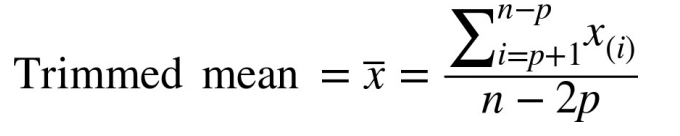

In [ ]:
def trimm_mean(arr, percent):
  n = len(arr)
  k = int (round(n*(float(percent)/100)/2))
  return np.mean(arr[k+1:n-k-1])

In [ ]:
trimm_mean(data['Population'],20)

5.5

In [ ]:
from scipy import stats
stats.trim_mean(data['Population'],0.2)

5.5

Weighted mean : Calculate by multi each data value x_i by a w_i and dividing thier sum by the sum of weight

- Ví dụ 1 : thuộc tính 1 ít chính xác hơn thuộc tính 2 --> w1<w2
- Ví dụ 2: thuộc tính nào đại diện, hoặc quan trọng hơn --> weight >>

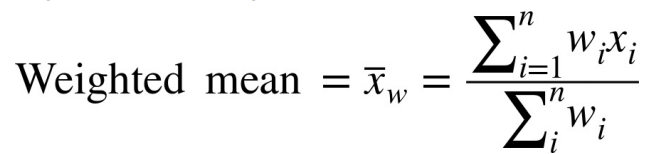

In [ ]:
w_i = np.arange(10)
w_i

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
weight_mean = np.average(data['Population'],weights =w_i)
weight_mean

7.333333333333333

Median and Robust Estimates: the middle number on a sorted list of the data

Tại sao nên dùng Median hơn trong 1 số trường hợp ?
Ví dụ so sánh độ giàu của vùng A và B (giả sử A có Bill Gates) --> nếu lấy Means thì chắc chắn A>>B --> không phản ảnh rõ tình hình độ giàu của khu A so với B

In [ ]:
np.sort(data['Murder rate'])[len(data['Murder rate'])//2]

5.6

In [ ]:
np.median(data['Murder rate'])

5.6

Weight Median: value such that the sum of the weights is equal for the lower and upper halves sorted list

giá trị trọng số mà tại đó tổng hai bên(được chia bằng số đo) của dãy trọng số là cân bằng nhất 
VD: {0,15,0.1,0.2,0.3,0.25}   -> 0.3 vì hai bên là 0.25 và 0.55 cân bằng nhất trong tất cả sự lựa chọn

In [ ]:
def weight_median(arr,W):
  pair =[]
  for i in range(len(arr)):
    pair.append([arr[i],W[i]])
  pair.sort(key = lambda p:p[0])

  if len(arr)%2 != 0:
      sums = 0
      for i,w in pair:
        sums += w
        if sums > 0.5:
          print("The weight mean",end= ' ')
          print("is element {}".format(i))
  else:
      sums = 0
      for i,w in pair:
         sums += w
         if(sums>=0.5):
           print("Lower Weight Mean",end=' ')
           print("is element {}".format(i))
           break
      sums = 0
      for i in range(len(pair) -1,-1,-1):
        element = pair[i][0]
        weight = pair[i][1]

        sums +=w

        if sums>=0.5:
          print("Upper Weight Mean",end=' ')
          print("is element {}".format(element))
          break



In [ ]:
weight_median(data['Murder rate'],[0.1,0.1,0.1,0.2,0.1,0,0.1,0.1,0.1,0.1])

Lower Weight Mean is element 5.6
Upper Weight Mean is element 5.8


--> Median và Weight Median --> đều mạnh mẽ với ngoại lệ